# IMPORTS

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15.0, 8.0)

In [2]:
import numpy as np
import pandas as pd
import time
import h5py

# LOAD DATA

In [10]:
t0 = pd.read_json('../../trials_with_delta.json')
metasession = pd.read_json('../../metasession.json')

# PLOT HELPERS

In [24]:
import string
letters_name = [letter for letter in string.ascii_uppercase[:12]]

tablet_size = (25.4, 16.93)

plane_size = (1489, 1053)
target_spread = np.array((177, 531, 885, 1239), dtype=float)

targets_coord = np.ones((3,4,2))
targets_coord[:,:,0] = target_spread / plane_size[0]
targets_coord[:,:,1] = target_spread[:3, None][::-1] / plane_size[1]

## create a dict 
letters_dict = dict()
for letter, pos in zip(letters_name, targets_coord.reshape(-1,2)):
    letters_dict[letter] = pos

targets_xy = {}

def interpolate_target(target):
    letters = target.split('-')
    lxy = np.zeros((len(letters), 2))
    for i, letter in enumerate(letters): lxy[i] = letters_dict[letter]
    lxy = np.c_[np.arange(len(letters)).T, lxy]

    lxy_interp = np.zeros((100, 2))
    lxy_interp[:,0] = np.interp(np.linspace(0,2,100), lxy[:,0], lxy[:,1])
    lxy_interp[:,1] = np.interp(np.linspace(0,2,100), lxy[:,0], lxy[:,2])

    return lxy_interp

for k,v in metasession.iterrows(): 
    name = v['name']
    target_xy = interpolate_target(name)
    targets_xy[name] = target_xy


def sugar_plot(ax, target):
    '''Add the grid in the background and the axis names.'''

    for k,v in letters_dict.iteritems():
        A_x, A_y = v * tablet_size
        ax.plot(A_x, A_y, 'r+', markersize=10)
        ax.annotate(k, xy=(A_x,A_y), xytext=(A_x+0.1,A_y+0.1), size=10)
        ax.set_xlabel('x [cm]');ax.set_ylabel('y [cm]');ax.set_xlim([0,25.4]);ax.set_ylim([0,16.93])    
    
    lines = [[], []]
    for letter in target.split('-'):
        x,y = letters_dict[letter] * tablet_size
        lines[0].append(x), lines[1].append(y)
        ax.plot(lines[0], lines[1])

# PLOT ONE

J-G


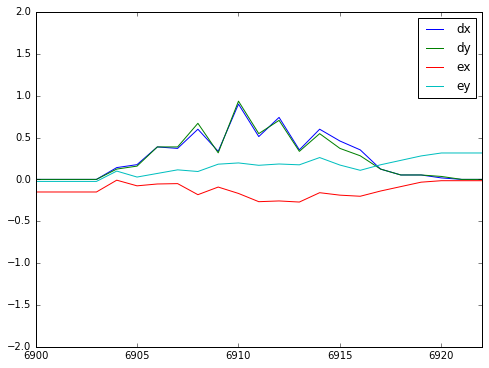

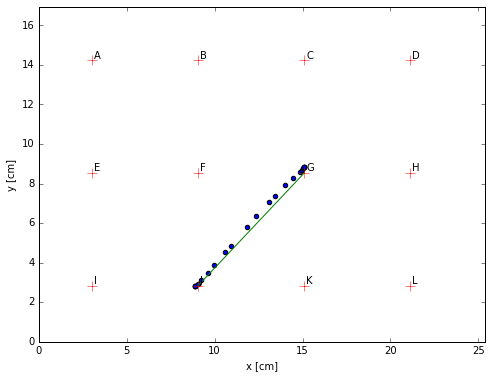

In [25]:
filtered_line_vshape_sessions = list(set(t0['session']))

session = np.random.choice(filtered_line_vshape_sessions)
data = t0[t0['session'] == session]
target_name = metasession[metasession['bound'].apply(lambda x: x.__contains__(session))]['name'].iloc[0]

print target_name

fig, ax = plt.subplots(figsize=(8,6))
ax.set_ylim([-2,2])
data[['dx', 'dy', 'ex', 'ey']].plot(ax=ax)

fig, ax = plt.subplots(figsize=(8,6))
dataplot = data[['x', 'y', 'session']] * (tablet_size + (1,))
dataplot.plot(x='x', y='y', kind='scatter', ax=ax)

sugar_plot(ax, target_name)

# PLOT DELTAS

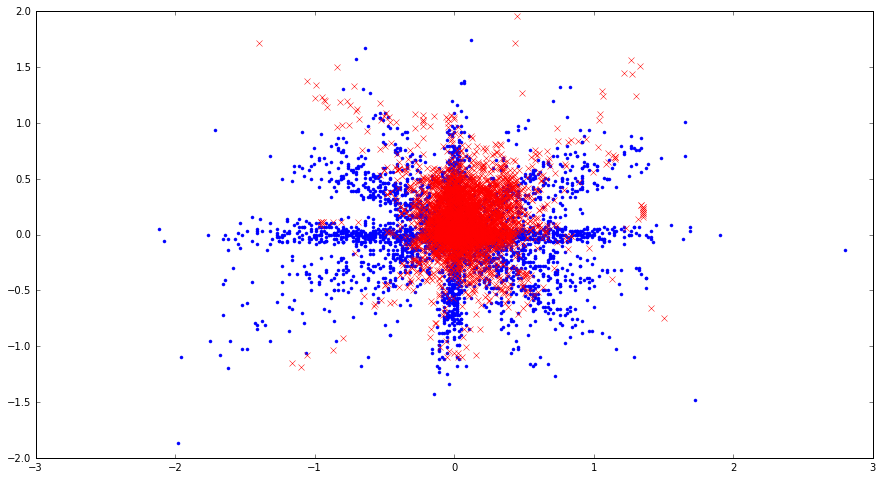

In [26]:
X = t0[['dx', 'dy']].as_matrix()
Y = t0[['ex', 'ey']].as_matrix()

plt.plot(X[:,0], X[:,1], '.')
plt.plot(Y[:,0], Y[:,1], 'rx')